In [1]:
#LMS
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import DistanceMetric
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [26]:
import numpy as np
from sklearn.cluster import KMeans

class RBF:
    def __init__(self, epoch=1, eta=0.01) -> None:
        self.C = None
        self.sigma = 1
        self.epoch = epoch
        self.eta = eta
        self.hide_node = 2
        self.output_node = None
        self.W_output = None
        self.error = []
        
    def fit(self, X, Y, C = None):
        # self.C = self.find_centre(X)
        self.C = C
        self.output_node = Y.shape[1]
        # self.W_output = np.random.uniform(-0.01, 0.01, (self.hide_node, self.output_node))
        self.W_output = np.zeros((self.hide_node, self.output_node))
        print(self.W_output)
        # Hidden layer
        for _ in range(self.epoch):
            H = np.zeros((X.shape[0], self.hide_node))
            for i in range(self.hide_node):
                H[:, i] = self.gaussian_rbf(X, self.C[i], self.sigma)
            # Output layer
            Y_hat = H @ self.W_output
            # Tuning Output parameter
            e = Y - Y_hat
            print(self.eta * (H.T @ e))
            self.W_output += self.eta * (H.T @ e)
            print(self.W_output)
            self.error.append(np.mean(e**2))

    def find_centre(self, X):
        model = KMeans(n_clusters=self.hide_node, random_state=0)
        return model.fit(X).cluster_centers_
    
    def gaussian_rbf(self, X, C, sigma):
        return np.exp(-((np.linalg.norm(X - C, axis=1)**2) / (2 * sigma**2)))


In [3]:

class Random_NN:
    def __init__(self) -> None:
        self.hide_node = 3
        self.W_input = None
        self.W_output = None
        self.error = []
        
    def fit(self, X,Y):
        X = np.insert(X,0,1,axis=1)
        self.W_input = np.random.uniform(-0.01,0.01, (X.shape[1],self.hide_node))
        #Hidden layer
        H = self.sigmoid(X @ self.W_input)
        H = np.insert(H,0,1,axis=1)
        #Tuning Output parameter
        print(H.shape)
        print(Y.shape)
        self.W_output = np.linalg.inv(H.T @ H) @ H.T @ Y
    
    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        H = self.sigmoid(X @ self.W_input)
        H = np.insert(H, 0, 1, axis=1)
        return H @ self.W_output

        
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))

In [22]:
X=np.array([[0.1,0.9],
            [0.2,0.8],
            [0.3,0.7],
            [0.9,0.1],
            [0.9,-0.1]])

Y=np.array([[-1],
            [-1],
            [-1],
            [1],
            [1]])

C = np.array([[0.9,0],
              [0.2,0.8]])

In [27]:
model_rbf = RBF(eta=0.1,epoch=2)
model_rbf.fit(X,Y,C)

[[0.]
 [0.]]
[[ 0.02835705]
 [-0.18454275]]
[[ 0.02835705]
 [-0.18454275]]
[[ 0.07206636]
 [-0.12596373]]
[[ 0.10042341]
 [-0.31050648]]


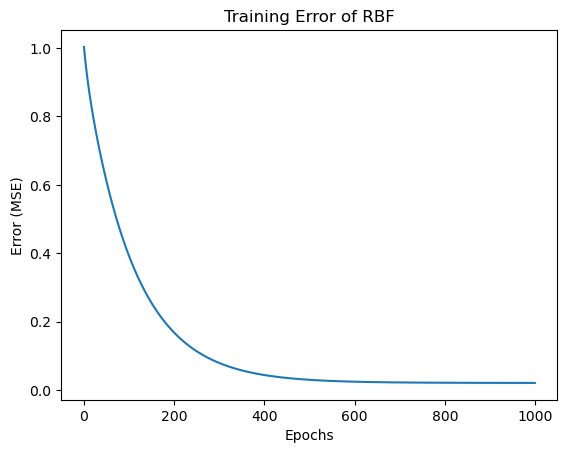

In [6]:
plt.plot(model_rbf.error)
plt.xlabel('Epochs')
plt.ylabel('Error (MSE)')
plt.title('Training Error of RBF')
plt.show()

In [7]:
model_random = Random_NN()
model_random.fit(X,Y)
error_train = mean_squared_error(Y, model_random.predict(X))
print('error train:', error_train)


(5, 4)
(5, 1)
error train: 0.03182818622570641


In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_data = load_iris()
X = iris_data.data
Y = iris_data.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

scaler = MinMaxScaler().fit(X_train)
encoder = LabelBinarizer().fit(y_train)

#data for training phase
X_train_iris = scaler.transform(X_train)
y_train_iris = encoder.transform(y_train)

#data for testing phase
X_test_iris = scaler.transform(X_test)
y_test_iris = encoder.transform(y_test)

c:\Users\gotxz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


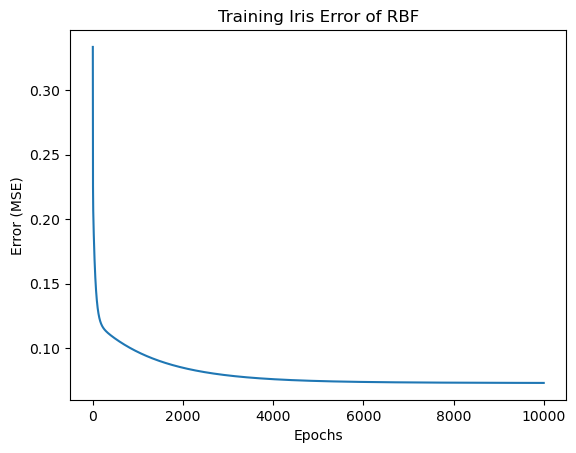

In [9]:
model_rbf_iris = RBF(eta=0.001, epoch=10000)
model_rbf_iris.fit(X_train_iris, y_train_iris)
plt.plot(model_rbf_iris.error)
plt.xlabel('Epochs')
plt.ylabel('Error (MSE)')
plt.title('Training Iris Error of RBF')
plt.show()

In [10]:
model_random_iris = Random_NN()
model_random_iris.fit(X_train_iris, y_train_iris)
error_train = mean_squared_error(y_train_iris, model_random_iris.predict(X_train_iris))
print('Error train data:', error_train)
error_test = mean_squared_error(y_test_iris, model_random_iris.predict(X_test_iris))
print('Error test data:', error_test)

(100, 4)
(100, 3)
Error train data: 0.1053590976653791
Error test data: 0.09576477464808779


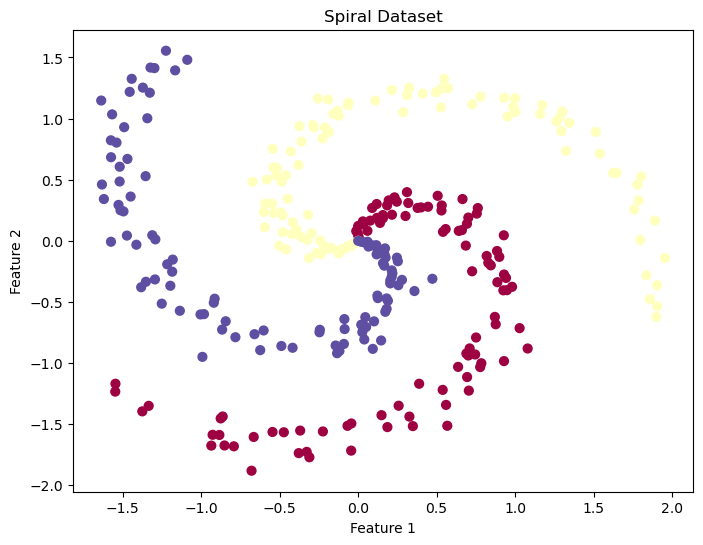

In [11]:
from sklearn.datasets import make_classification

def create_spiral_data(points, classes):
    X = np.zeros((points*classes, 2))  # Data matrix (each row = single example)
    y = np.zeros(points*classes, dtype='uint8')  # Class labels

    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 2, points)  # Radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2  # Theta
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = class_number

    return X, y

# Parameters
points_per_class = 100
number_of_classes = 3

# Generate dataset
X, y = create_spiral_data(points_per_class, number_of_classes)

# Plot dataset
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.title("Spiral Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

scaler = MinMaxScaler().fit(X)
encoder = LabelBinarizer().fit(y)

#data for training phase
X_train_spiral = scaler.transform(X)
y_train_spiral = encoder.transform(y)


c:\Users\gotxz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


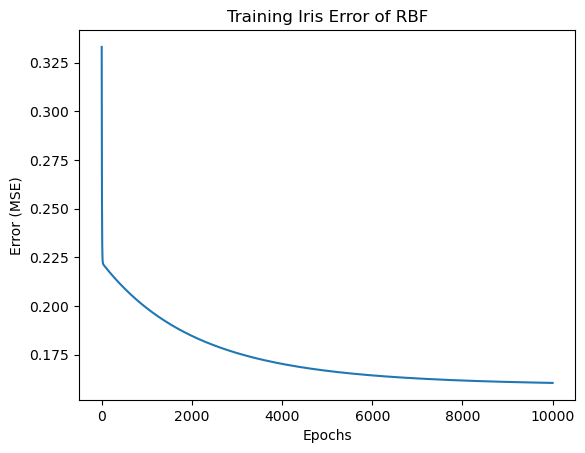

In [17]:
model_rbf_spiral = RBF(epoch=10000, eta=0.0001)
model_rbf_spiral.fit(X_train_spiral, y_train_spiral)
plt.plot(model_rbf_spiral.error)
plt.xlabel('Epochs')
plt.ylabel('Error (MSE)')
plt.title('Training Iris Error of RBF')
plt.show()

In [16]:
model_random_spiral = Random_NN()
model_random_spiral.fit(X_train_spiral, y_train_spiral)
error_train = mean_squared_error(y_train_spiral, model_random_spiral.predict(X_train_spiral))
print('Error train data:', error_train)

(300, 4)
(300, 3)
Error train data: 0.2832771908530001
